In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

LOADING DATASET

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['ID', 'Diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
         'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points',
         'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture',
         'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity',
         'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius',
         'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness',
         'worst_compactness', 'worst_concavity', 'worst_concave_points',
         'worst_symmetry', 'worst_fractal_dimension']

data = pd.read_csv(url, names=names)

In [ ]:
data

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.head()

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()

,ID,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:

num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 569
Number of columns: 32


In [ ]:
data.nunique()

ID                         569
Diagnosis                    2
mean_radius                456
mean_texture               479
mean_perimeter             522
mean_area                  539
mean_smoothness            474
mean_compactness           537
mean_concavity             537
mean_concave_points        542
mean_symmetry              432
mean_fractal_dimension     499
se_radius                  540
se_texture                 519
se_perimeter               533
se_area                    528
se_smoothness              547
se_compactness             541
se_concavity               533
se_concave_points          507
se_symmetry                498
se_fractal_dimension       545
worst_radius               457
worst_texture              511
worst_perimeter            514
worst_area                 544
worst_smoothness           411
worst_compactness          529
worst_concavity            539
worst_concave_points       492
worst_symmetry             500
worst_fractal_dimension    535
dtype: i

PRE-PROCESSING DATA

1.HANDLING MISSING VALUES

In [ ]:
print("The Number of Missing Values in the dataset\n")
data.isnull().sum()

The Number of Missing Values in the dataset



ID                         0
Diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

2.ENCODING CATEGORICAL TARGET VARIABLE

In [ ]:
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

In [ ]:
data

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int32  
 2   mean_radius              569 non-null    float64
 3   mean_texture             569 non-null    float64
 4   mean_perimeter           569 non-null    float64
 5   mean_area                569 non-null    float64
 6   mean_smoothness          569 non-null    float64
 7   mean_compactness         569 non-null    float64
 8   mean_concavity           569 non-null    float64
 9   mean_concave_points      569 non-null    float64
 10  mean_symmetry            569 non-null    float64
 11  mean_fractal_dimension   569 non-null    float64
 12  se_radius                569 non-null    float64
 13  se_texture               569 non-null    float64
 14  se_perimeter             5

3. NORMALIZATION AND STANDARDIZATION

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(['ID', 'Diagnosis'], axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[2:])

In [ ]:
data

,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


EXPLORATORY DATA ANALYSIS

1.CORRELATION HEATMAP

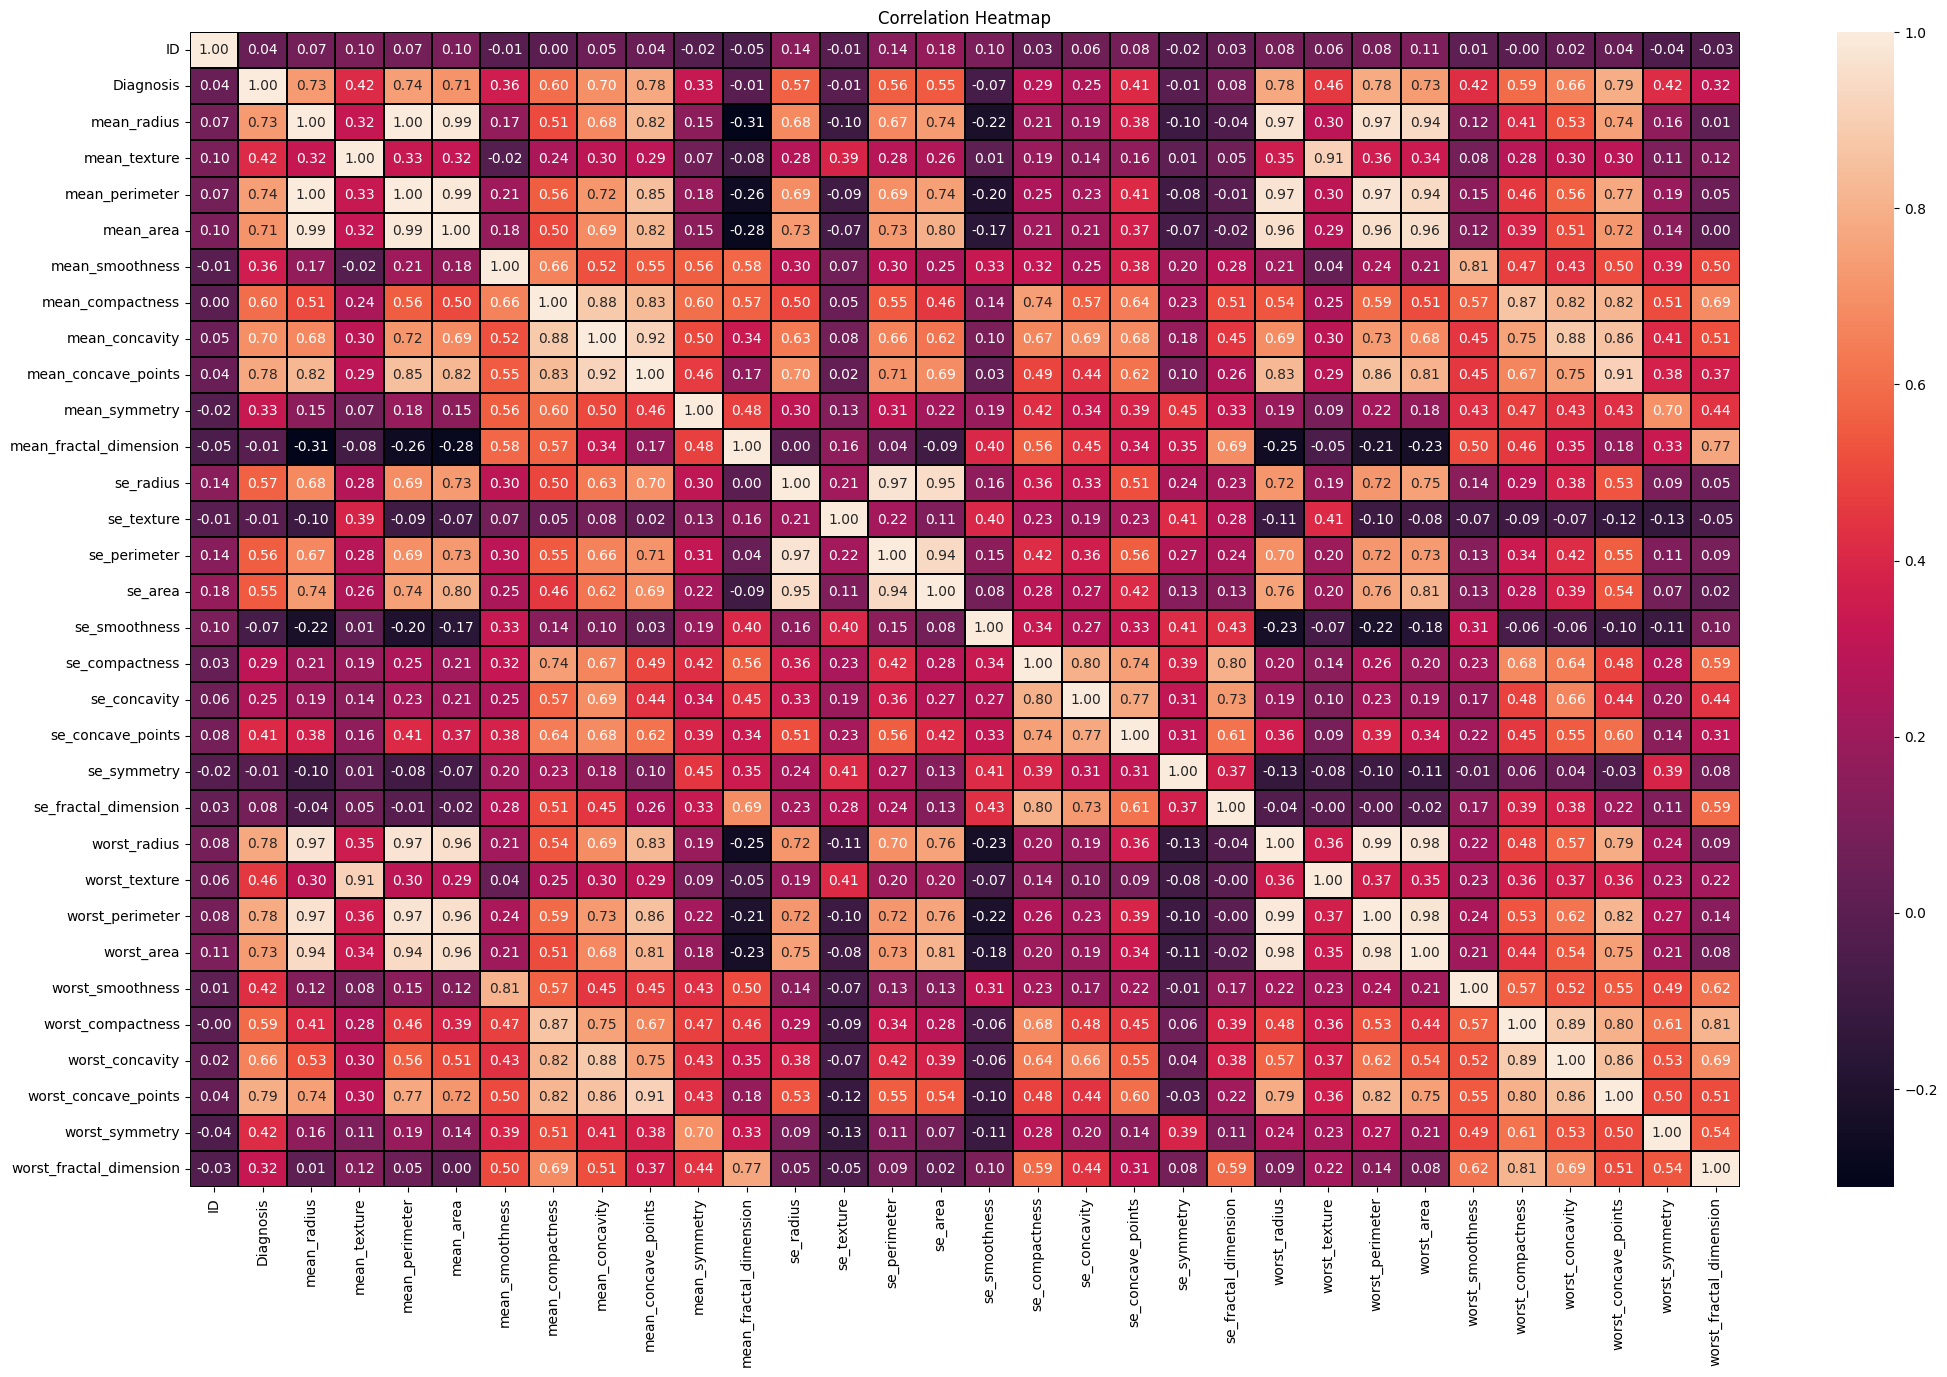

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, linecolor='black', fmt='.2f', linewidths=.1)
plt.title('Correlation Heatmap')
plt.show()

2. BAR-CHART


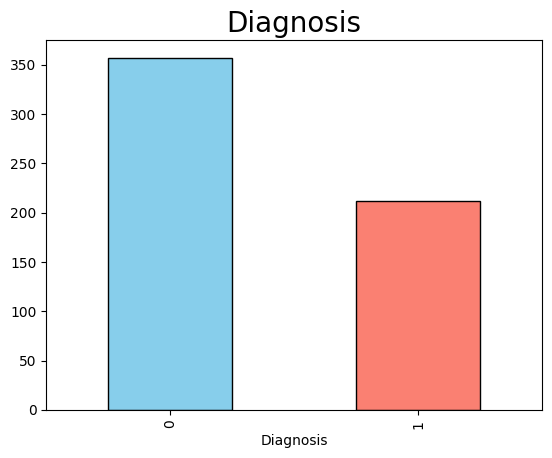

Diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
data['Diagnosis'].value_counts().plot(kind='bar',edgecolor='black',color=['skyblue','salmon'])
plt.title("Diagnosis",fontsize=20)
plt.show()
data['Diagnosis'].value_counts()

3. PIE-CHART OF TARGET COLUMN

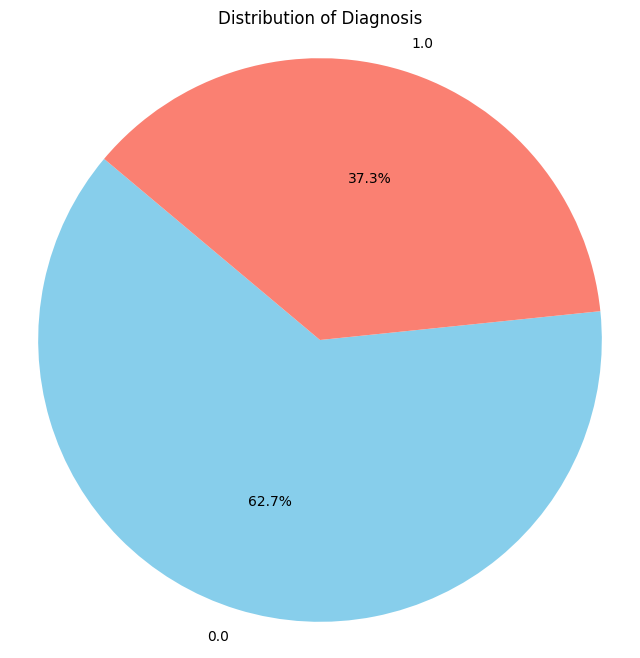

In [ ]:
# Count occurrences of each unique value in the 'Diagnosis' column
diagnosis_counts = data['Diagnosis'].value_counts()

# Define colors for each slice
colors = ['skyblue', 'salmon']

# Plotting the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


4. PAIRPLOT FOR HIGHLY CORRELATED FEATURES

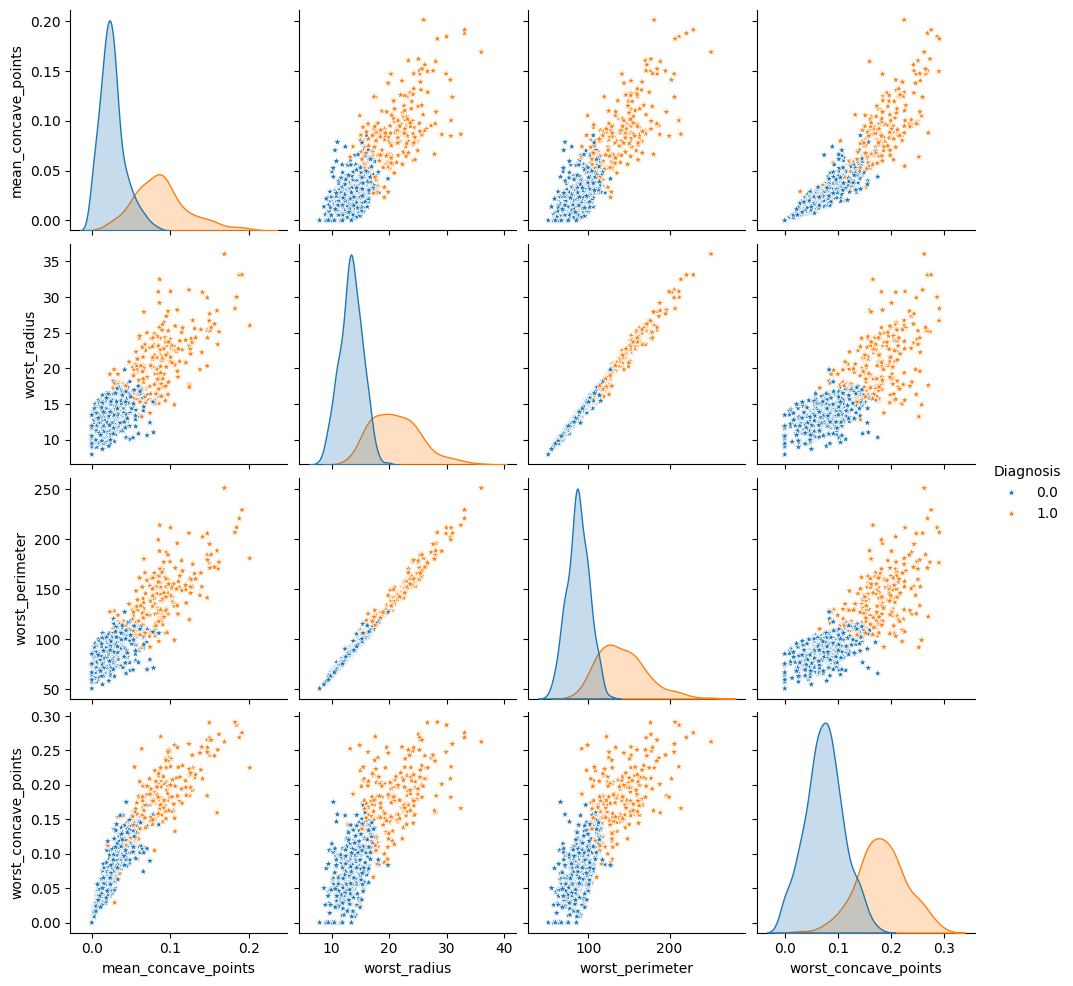

In [ ]:
threshold = 0.75
filtre = np.abs(correlation_matrix["Diagnosis"] > threshold)
corr_features = correlation_matrix .columns[filtre].tolist()
sns.pairplot(data[corr_features], diag_kind = "kde" , markers = "*", hue="Diagnosis")
plt.show()

In [ ]:
# Remove 'ID' column
data.drop('ID', axis=1, inplace=True)

# Convert 'Diagnosis' column to float64
data['Diagnosis'] = data['Diagnosis'].astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    float64
 1   mean_radius              569 non-null    float64
 2   mean_texture             569 non-null    float64
 3   mean_perimeter           569 non-null    float64
 4   mean_area                569 non-null    float64
 5   mean_smoothness          569 non-null    float64
 6   mean_compactness         569 non-null    float64
 7   mean_concavity           569 non-null    float64
 8   mean_concave_points      569 non-null    float64
 9   mean_symmetry            569 non-null    float64
 10  mean_fractal_dimension   569 non-null    float64
 11  se_radius                569 non-null    float64
 12  se_texture               569 non-null    float64
 13  se_perimeter             569 non-null    float64
 14  se_area                  5

SPLITTING DATA INTO TRAIN , TEST AND VALIDATION SETS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt

# Step 5: Split the data into training, testing, and validation sets
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% train, 20% validation, 20% test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

TRAINING AND TESTING MODEL

In [ ]:
#Train the model
models = {
    "Bagging": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

#Test the model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = y_pred

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Step 8: Measure the performance of the trained model
# (Assuming binary classification)
# (Assuming binary classification)
def calculate_roc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

Bagging: Accuracy = 0.9649
Random Forest: Accuracy = 0.9649
AdaBoost: Accuracy = 0.9561


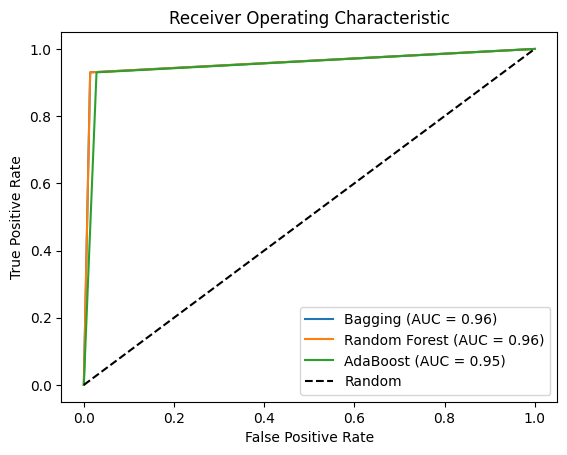

In [ ]:
# Step 9: Compare the results of each ensemble model using graphs
for name, y_pred in results.items():
    fpr, tpr, roc_auc = calculate_roc(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Bagging: Accuracy = 0.9649

Bagging Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



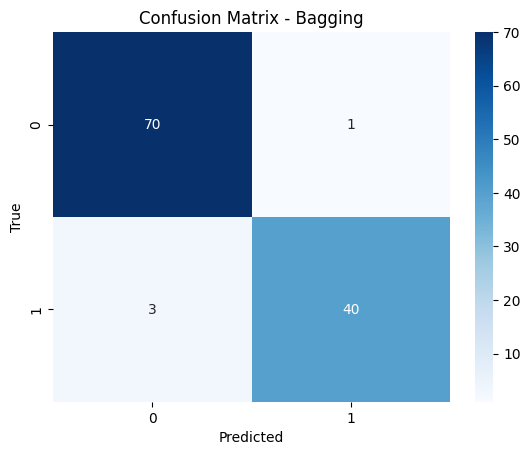

Random Forest: Accuracy = 0.9649

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



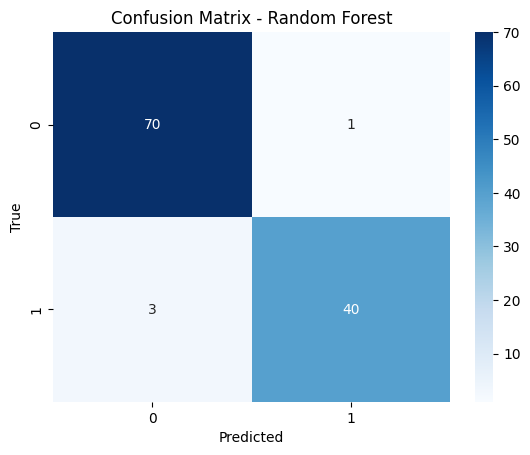

AdaBoost: Accuracy = 0.9561

AdaBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        71
         1.0       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



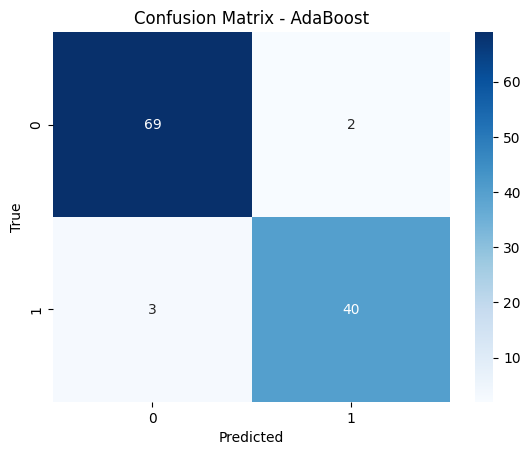

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 9: Compare the results of each ensemble model using graphs
for name, y_pred in results.items():


    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

    # Print classification report
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot confusion matrix
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


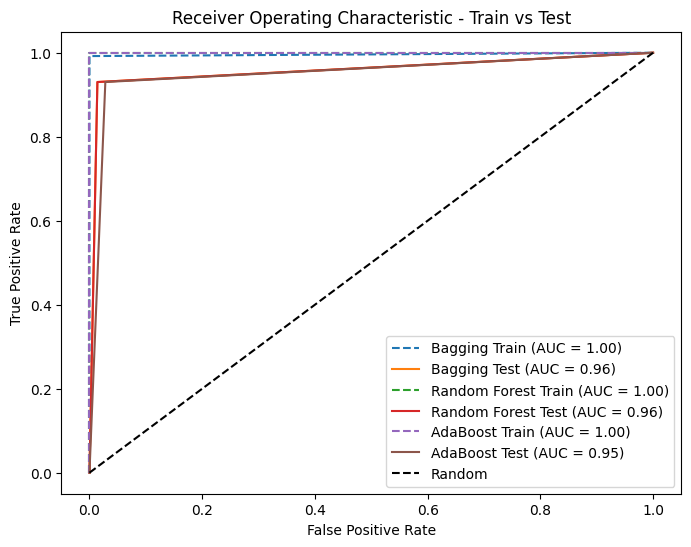

In [ ]:
# Step 10: Represent the ROC of training and test results in the graphs
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    fpr_train, tpr_train, roc_auc_train = calculate_roc(y_train, y_train_pred)
    plt.plot(fpr_train, tpr_train, label=f'{name} Train (AUC = {roc_auc_train:.2f})', linestyle='--')

    fpr_test, tpr_test, roc_auc_test = calculate_roc(y_test, results[name])
    plt.plot(fpr_test, tpr_test, label=f'{name} Test (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Train vs Test')
plt.legend(loc='lower right')
plt.show()